# Week 7: Molecular Dynamics

## Aim

Write code to perform a simple molecular dynamics simulation of a harmonic oscillator, using (a) Euler integration, and (b) Velocity Verlet integration. Calculate some simple thermodynamic averages and confirm that your system obeys classical equipartition.

## Details

The potential energy for a diatomic molecule modelled as a classical harmonic oscillator is

\begin{equation}
U(r) = k(r - r_0)^2,
\end{equation}
where $r$ is the bond length, $r_0$ is the equilibrium bond length, and $k$ is the bond force constant.

We can model the dynamics of this system by solving the following equations, and then numerically integrating the relevant equations of motion.

\begin{equation}
F(r) = -\frac{\mathrm{d}U}{\mathrm{d}r} = -2k(r - r_\mathrm{0})
\end{equation}
\begin{equation}
a(r) = \frac{F(r)}{m}
\end{equation}

where $m$ is the effective mass of the molecule.

The relevant equations of motion are

\begin{equation}
v(t+\delta t) = v(t) + a(t)\delta t,
\end{equation}
\begin{equation}
r(t+\delta t) = r(t) + v(t)\delta t + \frac{1}{2}a(t)\delta t^2.
\end{equation}

1. (a) Write a function to calculate the potential energy of H$_2$, modelled as a harmonic oscillator. Use $k=575$ N m$^{-1}$ and $r_0 = 0.74$ Å.

In [1]:
def U_harmonic(r, r0, k):
    """Potential energy for a harmonic oscillator.
    
    Args:
        r (float): The position.
        r0 (float): The equilibrium position.
        k (float): Bond force constant.
        
    Returns:
        float
        
    """
    return k * (r - r0)**2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r_range = np.linspace(0.38, 1.1)
r_range

array([0.38      , 0.39469388, 0.40938776, 0.42408163, 0.43877551,
       0.45346939, 0.46816327, 0.48285714, 0.49755102, 0.5122449 ,
       0.52693878, 0.54163265, 0.55632653, 0.57102041, 0.58571429,
       0.60040816, 0.61510204, 0.62979592, 0.6444898 , 0.65918367,
       0.67387755, 0.68857143, 0.70326531, 0.71795918, 0.73265306,
       0.74734694, 0.76204082, 0.77673469, 0.79142857, 0.80612245,
       0.82081633, 0.8355102 , 0.85020408, 0.86489796, 0.87959184,
       0.89428571, 0.90897959, 0.92367347, 0.93836735, 0.95306122,
       0.9677551 , 0.98244898, 0.99714286, 1.01183673, 1.02653061,
       1.04122449, 1.05591837, 1.07061224, 1.08530612, 1.1       ])

In [4]:
k = 575.0
r0 = 0.74

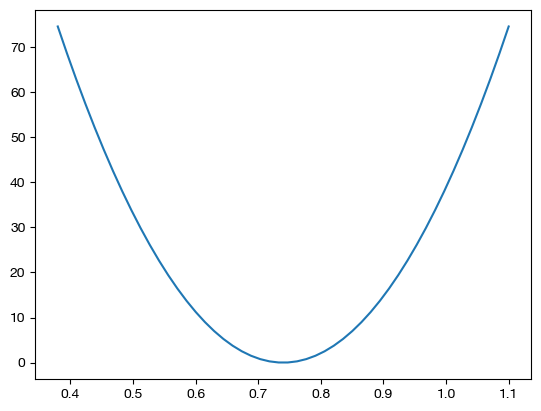

In [5]:
plt.plot(r_range, U_harmonic(r=r_range, r0=r0, k=k))
plt.show()

1. (b) Write a function to calculate the force acting on your system as a function of $r$.
Plot this force function for $0.38 \leq r \leq 1.1$ Å.

In [6]:
def F_harmonic(r, r0, k):
    """Force for a harmonic oscillator.
    
    Args:
        r (float): The position.
        r0 (float): The equilibrium position.
        k (float): Bond force constant.
        
    Returns:
        float
        
    """
    return -2.0 * k * (r - r0)

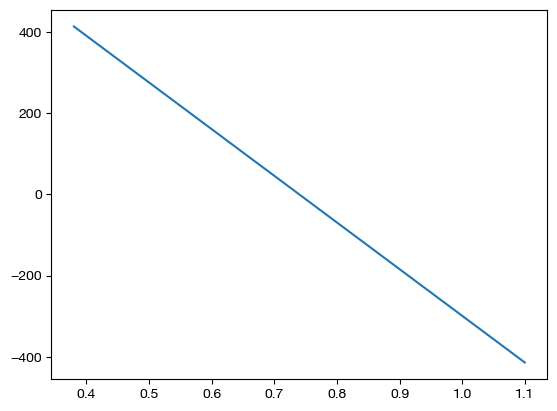

In [7]:
plt.plot(r_range, F_harmonic(r=r_range, r0=r0, k=k))
plt.show()

2. (a) Write a piece of code to perform $50 000$ steps of molecular dynamics simulation, using Euler integration, starting with $r(t = 0) = 1.0$ Å and $v(t = 0) = 0.0$. Use a mass of $m = 0.5$ and a timestep of $\Delta t = 1 \times 10^{-5}$. Store $r(t)$ and $v(t)$ at each step.

In [8]:
r = 1.0
v = 0.0
m = 0.5
dt = 1e-5

In [9]:
n_steps = 50000
r_stored = []
v_stored = []
pot_eng_stored = []
kin_eng_stored = []

# intialise the first timestep
r_t = r
v_t = v

for i in range(n_steps):
    # store the current position and velocity
    r_stored.append(r_t)
    v_stored.append(v_t)
    
    # store potential and kinetic energy
    pot_eng_stored.append(U_harmonic(r=r_t, r0=r0, k=k))
    kin_eng_stored.append(0.5 * m * v_t**2)
    
    # calculate the force → acceleration, and predict v(t+dt) and r(t+dt)
    force = F_harmonic(r=r_t, r0=r0, k=k)
    a_t = force / m
    v_t_plus_dt = v_t + a_t * dt
    r_t_plus_dt = r_t + v_t * dt + 1/2 * a_t * dt**2

    # update to the next timestep
    r_t = r_t_plus_dt
    v_t = v_t_plus_dt

2. (b) Plot $t$ versus $r(t)$.

In [10]:
timesteps = np.arange(n_steps) * dt

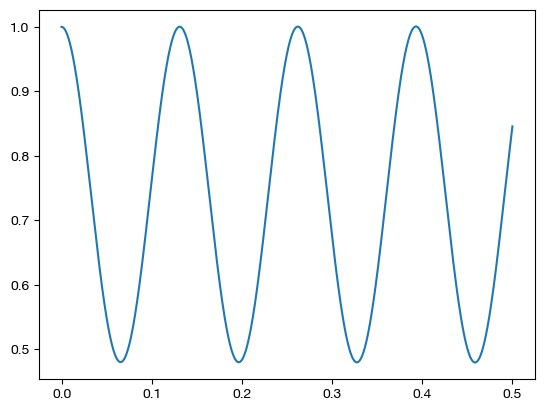

In [11]:
plt.plot(timesteps, r_stored)
plt.show()

2. (c) Plot a histogram of the probability distribution of bond lengths, $P(r)$, using `matplotlib.pyplot.hist()`.

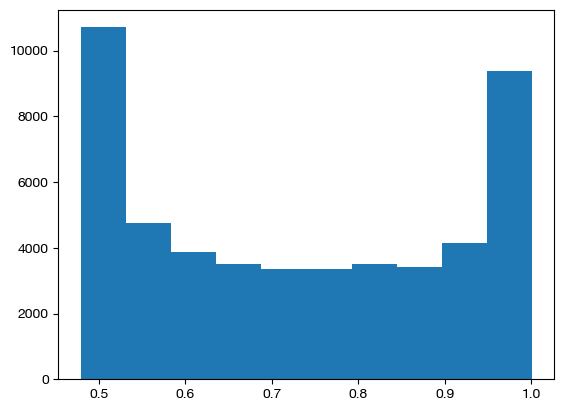

In [12]:
plt.hist(r_stored)
plt.show()

2. (d) Plot the potential energy, kinetic energy, and total energy of your system as a function of time.

In [13]:
pot_eng_stored = np.array(pot_eng_stored)
kin_eng_stored = np.array(kin_eng_stored)

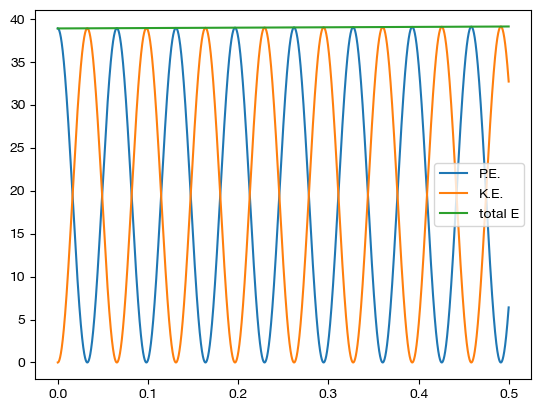

In [14]:
plt.plot(timesteps, pot_eng_stored, label="P.E.")
plt.plot(timesteps, kin_eng_stored, label="K.E.")
plt.plot(timesteps, pot_eng_stored + kin_eng_stored, label="total E")
plt.legend()
plt.show()

3. (a) Rerun your simulation for 500000 steps. Confirm that your simulation is _not_ conserving energy.

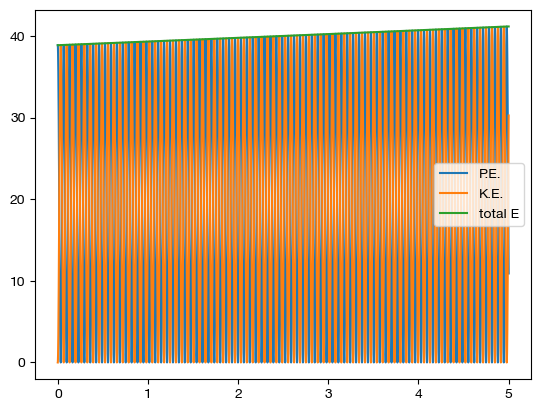

In [15]:
n_steps = 500000
r_stored = []
v_stored = []
pot_eng_stored = []
kin_eng_stored = []

# intialise the first timestep
r_t = r
v_t = v

for i in range(n_steps):
    # store the current position and velocity
    r_stored.append(r_t)
    v_stored.append(v_t)
    
    # store potential and kinetic energy
    pot_eng_stored.append(U_harmonic(r=r_t, r0=r0, k=k))
    kin_eng_stored.append(0.5 * m * v_t**2)
    
    # calculate the force → acceleration, and predict v(t+dt) and r(t+dt)
    force = F_harmonic(r=r_t, r0=r0, k=k)
    a_t = force / m
    v_t_plus_dt = v_t + a_t * dt
    r_t_plus_dt = r_t + v_t * dt + 1/2 * a_t * dt**2

    # update to the next timestep
    r_t = r_t_plus_dt
    v_t = v_t_plus_dt

# storing data in numpy arrays
pot_eng_stored = np.array(pot_eng_stored)
kin_eng_stored = np.array(kin_eng_stored)
timesteps = np.arange(n_steps) * dt

plt.plot(timesteps, pot_eng_stored, label="P.E.")
plt.plot(timesteps, kin_eng_stored, label="K.E.")
plt.plot(timesteps, pot_eng_stored + kin_eng_stored, label="total E")
plt.legend()
plt.show()

3. (b) Rerun your simulation with $\Delta t = 1 \times 10^{-4}$. What happens to your total energy? Why does the energy behave like this?

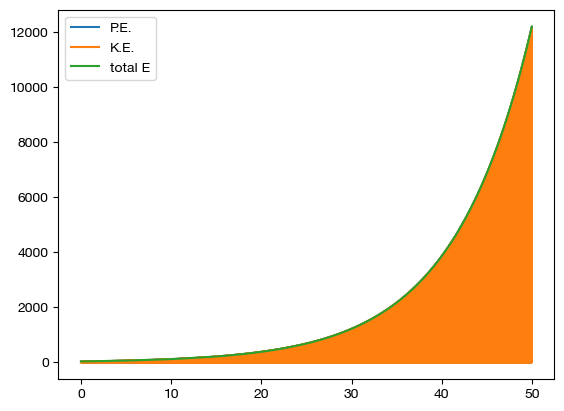

In [16]:
dt = 1e-4
n_steps = 500000
r_stored = []
v_stored = []
pot_eng_stored = []
kin_eng_stored = []

# intialise the first timestep
r_t = r
v_t = v

for i in range(n_steps):
    # store the current position and velocity
    r_stored.append(r_t)
    v_stored.append(v_t)
    
    # store potential and kinetic energy
    pot_eng_stored.append(U_harmonic(r=r_t, r0=r0, k=k))
    kin_eng_stored.append(0.5 * m * v_t**2)
    
    # calculate the force → acceleration, and predict v(t+dt) and r(t+dt)
    force = F_harmonic(r=r_t, r0=r0, k=k)
    a_t = force / m
    v_t_plus_dt = v_t + a_t * dt
    r_t_plus_dt = r_t + v_t * dt + 1/2 * a_t * dt**2

    # update to the next timestep
    r_t = r_t_plus_dt
    v_t = v_t_plus_dt

# storing data in numpy arrays
pot_eng_stored = np.array(pot_eng_stored)
kin_eng_stored = np.array(kin_eng_stored)
timesteps = np.arange(n_steps) * dt

plt.plot(timesteps, pot_eng_stored, label="P.E.")
plt.plot(timesteps, kin_eng_stored, label="K.E.")
plt.plot(timesteps, pot_eng_stored + kin_eng_stored, label="total E")
plt.legend()
plt.show()

3. (c) Rewrite your code to use the velocity verlet algorithm to integrate the equations of motion. Run for 500000 steps, with $\Delta t = 1 \times 10^{-5}$ and confirm that your energy is now conserved.

From the week 7 lecture notes:

\begin{equation}
r(t+\Delta t) = r(t) + v(t)\Delta t + \frac{1}{2}a(t)\Delta t^2
\end{equation}

\begin{equation}
a(t+\Delta t) = \frac{1}{m}F(t+\Delta t)
\end{equation}

\begin{equation}
v(t + \Delta t) = v(t) + \frac{1}{2}[a(t) + a(t+\Delta t)]\Delta t
\end{equation}

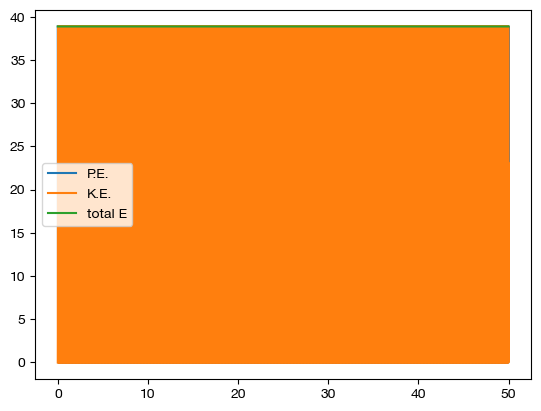

In [17]:
dt = 1e-4
n_steps = 500000
r_stored = []
v_stored = []
pot_eng_stored = []
kin_eng_stored = []

# intialise the first timestep
r_t = r
v_t = v

for i in range(n_steps):
    # store the current position and velocity
    r_stored.append(r_t)
    v_stored.append(v_t)
    
    # store potential and kinetic energy
    pot_eng_stored.append(U_harmonic(r=r_t, r0=r0, k=k))
    kin_eng_stored.append(0.5 * m * v_t**2)
    
    # calculate the force → acceleration, and predict v(t+dt) and r(t+dt)
    a_t = F_harmonic(r=r_t, r0=r0, k=k) / m
    r_t_plus_dt = r_t + v_t * dt + 1/2 * a_t * dt**2
    a_t_plus_dt = F_harmonic(r=r_t_plus_dt, r0=r0, k=k) / m
    v_t_plus_dt = v_t + (a_t + a_t_plus_dt)/2 * dt

    # update to the next timestep
    r_t = r_t_plus_dt
    v_t = v_t_plus_dt

# storing data in numpy arrays
pot_eng_stored = np.array(pot_eng_stored)
kin_eng_stored = np.array(kin_eng_stored)
timesteps = np.arange(n_steps) * dt

plt.plot(timesteps, pot_eng_stored, label="P.E.")
plt.plot(timesteps, kin_eng_stored, label="K.E.")
plt.plot(timesteps, pot_eng_stored + kin_eng_stored, label="total E")
plt.legend()
plt.show()

3. (d) Rerun your simulation using the velocity verlet algorithm with $\Delta t = 1 \times 10^{-3}$. What happens to your total energy?

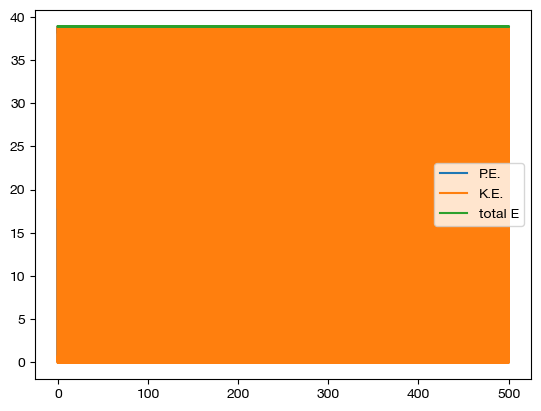

In [18]:
dt = 1e-3
n_steps = 500000
r_stored = []
v_stored = []
pot_eng_stored = []
kin_eng_stored = []

# intialise the first timestep
r_t = r
v_t = v

for i in range(n_steps):
    # store the current position and velocity
    r_stored.append(r_t)
    v_stored.append(v_t)
    
    # store potential and kinetic energy
    pot_eng_stored.append(U_harmonic(r=r_t, r0=r0, k=k))
    kin_eng_stored.append(0.5 * m * v_t**2)
    
    # calculate the force → acceleration, and predict v(t+dt) and r(t+dt)
    a_t = F_harmonic(r=r_t, r0=r0, k=k) / m
    r_t_plus_dt = r_t + v_t * dt + 1/2 * a_t * dt**2
    a_t_plus_dt = F_harmonic(r=r_t_plus_dt, r0=r0, k=k) / m
    v_t_plus_dt = v_t + (a_t + a_t_plus_dt)/2 * dt

    # update to the next timestep
    r_t = r_t_plus_dt
    v_t = v_t_plus_dt

# storing data in numpy arrays
pot_eng_stored = np.array(pot_eng_stored)
kin_eng_stored = np.array(kin_eng_stored)
timesteps = np.arange(n_steps) * dt

plt.plot(timesteps, pot_eng_stored, label="P.E.")
plt.plot(timesteps, kin_eng_stored, label="K.E.")
plt.plot(timesteps, pot_eng_stored + kin_eng_stored, label="total E")
plt.legend()
plt.show()

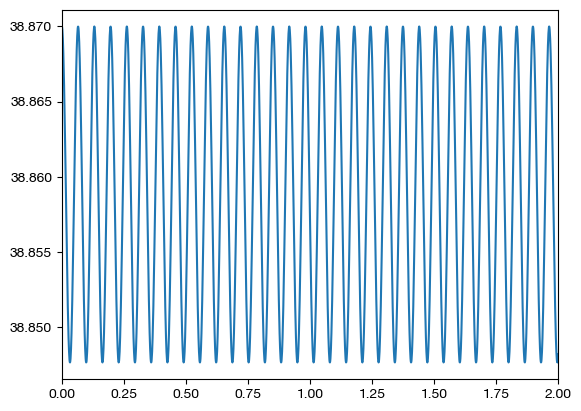

In [19]:
plt.plot(timesteps, pot_eng_stored + kin_eng_stored)
plt.xlim(0,2)
plt.show()

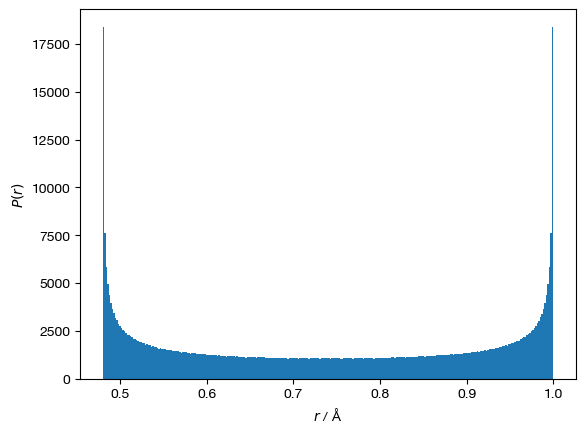

In [24]:
plt.hist(r_stored, bins=300)
plt.xlabel(r'$r$ / Å')
plt.ylabel(r'$P(r)$')
plt.show()